In [1]:
import pandas as pd
import matplotlib as plt
cars_df = pd.read_csv("cars.csv")

In [2]:
cars_df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
cars_df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [4]:
cars_df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


<AxesSubplot: ylabel='Frequency'>

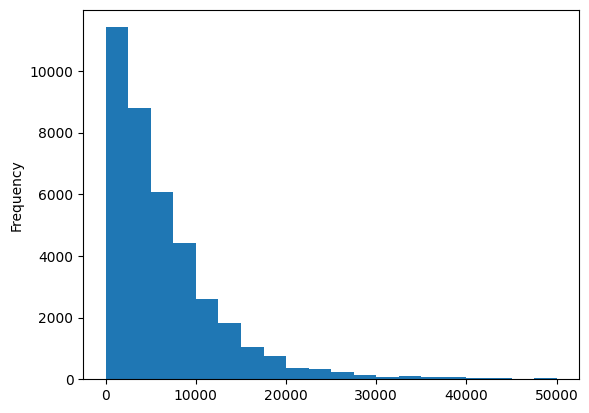

In [5]:
cars_df["price_usd"].mean()
cars_df["price_usd"].median()
cars_df["price_usd"].plot.hist(bins=20)

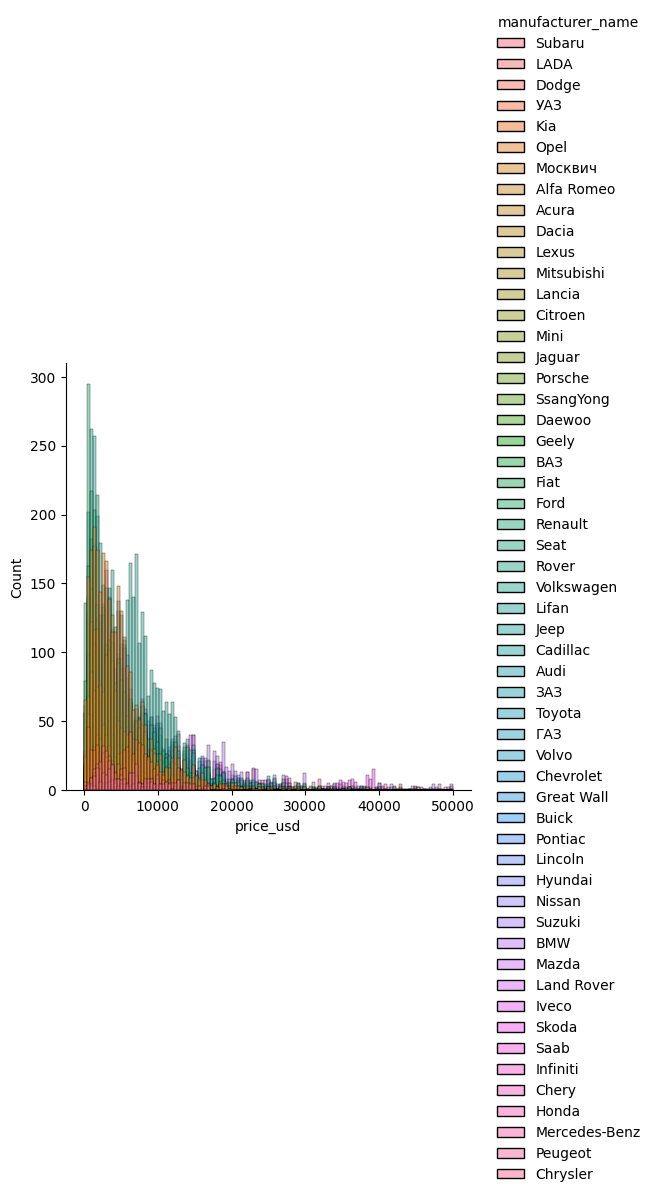

In [6]:
import seaborn as sns

sns.displot(cars_df, x= "price_usd", hue="manufacturer_name") 

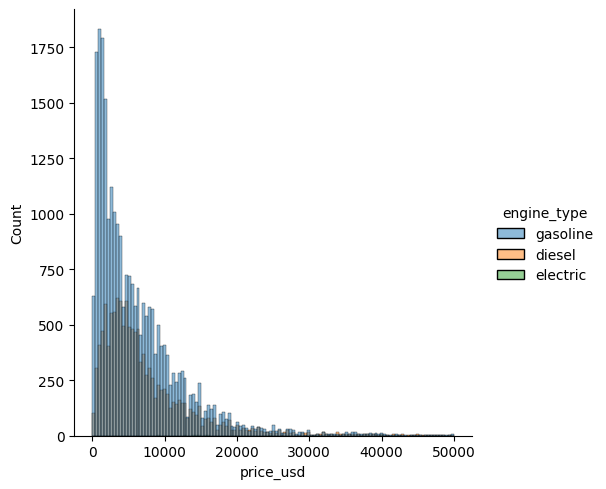

In [7]:
sns.displot(cars_df, x= "price_usd", hue="engine_type") 

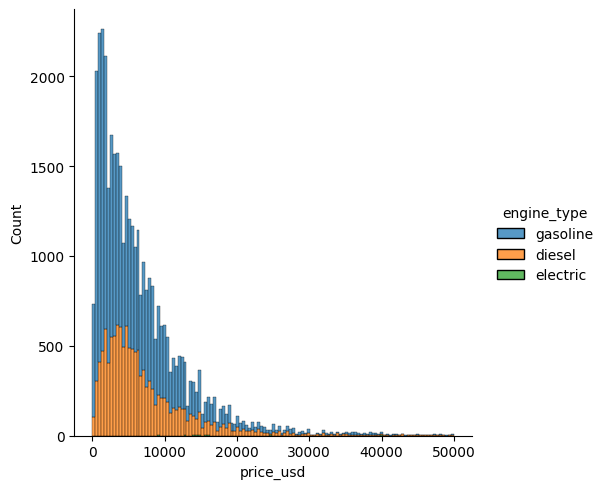

In [8]:
sns.displot(cars_df, x= "price_usd", hue="engine_type", multiple="stack") 

In [9]:
cars_df.groupby("engine_type").count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


<AxesSubplot: xlabel='price_usd', ylabel='Count'>

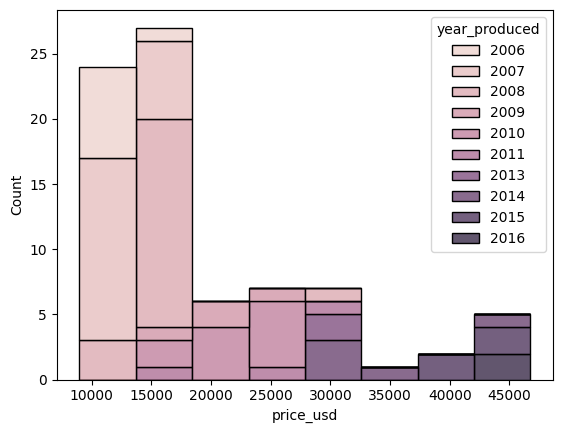

In [10]:
my_inerest_Q7 = cars_df.loc[(cars_df["manufacturer_name"] == "Audi") & (cars_df["model_name"]=="Q7")]
sns.histplot(my_inerest_Q7, x = 'price_usd', hue = 'year_produced', multiple="stack")


In [11]:
cars_df["price_usd"].std()

6428.1520182029035

In [13]:
cars_df["price_usd"].max() - cars_df["price_usd"].min()

49999.0

In [16]:
median = cars_df["price_usd"].median()
Q1 = cars_df["price_usd"].quantile(q=0.25)
Q3 = cars_df["price_usd"].quantile(q=0.75)
min_val = cars_df["price_usd"].quantile(q=0.0)
max_val = cars_df["price_usd"].quantile(q=1.0)
print(min_val, Q1, median, Q3, max_val)

1.0 2100.0 4800.0 8990.0 50000.0


In [17]:
iqr = Q3-Q1
iqr

6890.0

In [19]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print(minlimit, maxlimit)

-8235.0 19325.0


<AxesSubplot: xlabel='price_usd', ylabel='Count'>

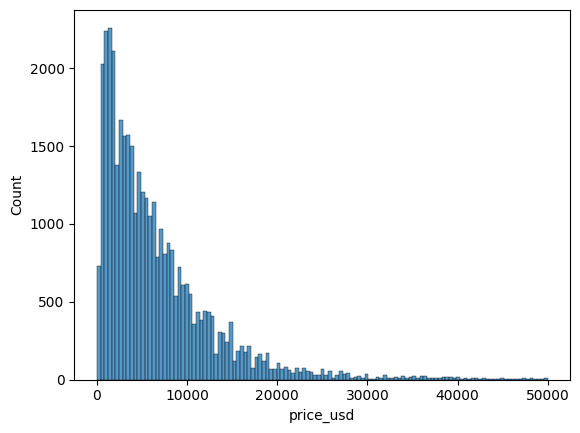

In [20]:
sns.histplot(cars_df["price_usd"])

<AxesSubplot: >

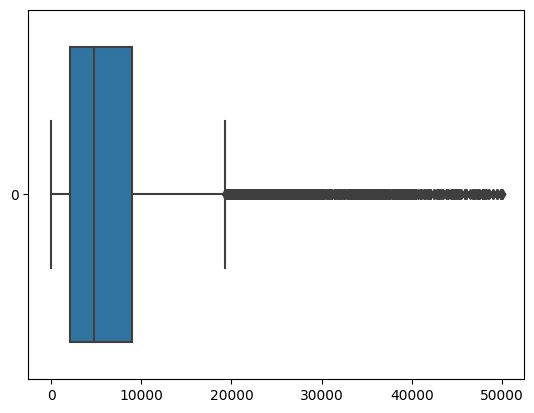

In [22]:
sns.boxplot(cars_df["price_usd"], orient="horizontal")

<AxesSubplot: xlabel='engine_fuel', ylabel='price_usd'>

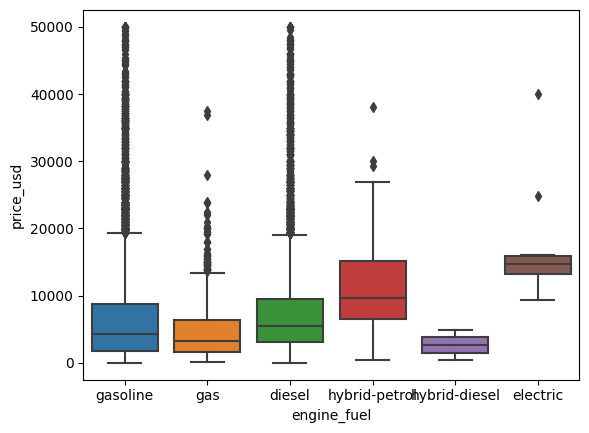

In [23]:
sns.boxplot(x="engine_fuel", y="price_usd", data=cars_df)

In [24]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot: xlabel='sepal_length', ylabel='petal_length'>

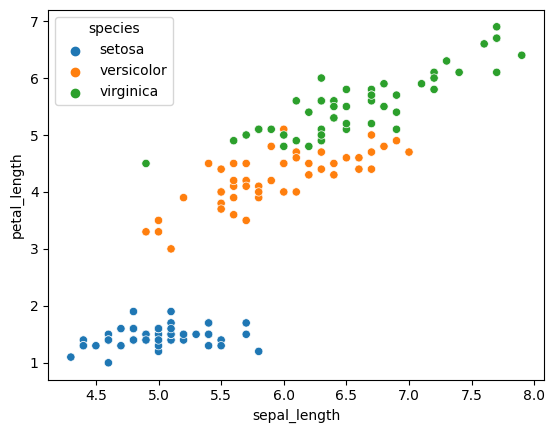

In [26]:
sns.scatterplot(data=iris, x="sepal_length", y="petal_length", hue="species")

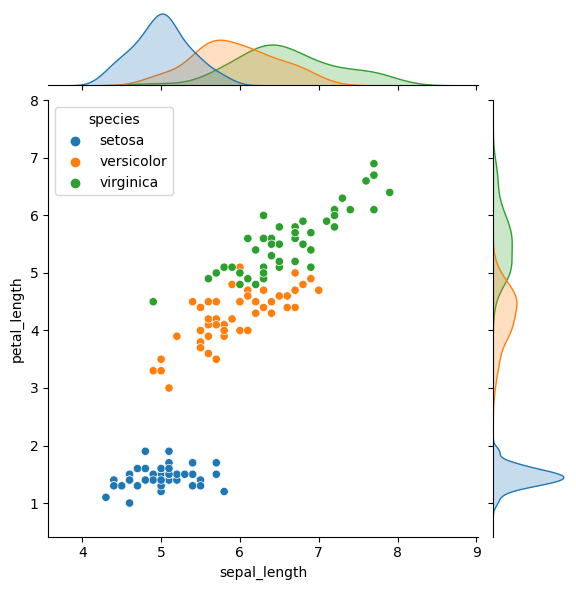

In [27]:
sns.jointplot(data=iris, x="sepal_length", y="petal_length", hue="species")

<AxesSubplot: xlabel='species', ylabel='sepal_length'>

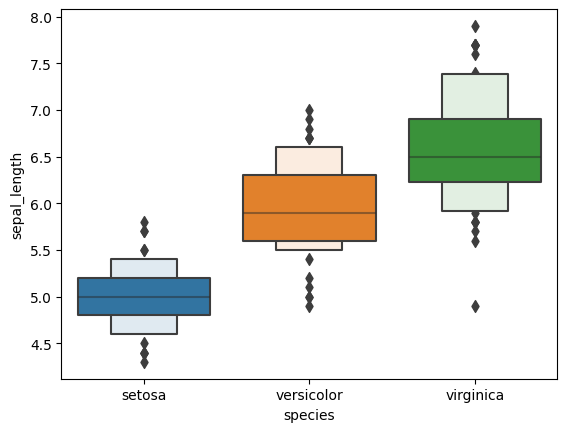

In [28]:
sns.boxenplot(x="species", y="sepal_length", data=iris)